FEATURE ENGINEERING SUPPORT EDA

Loading data from silver layer...

Trying date: 2024_03_01
  ✓ Loaded financials data (511 rows)
  ✓ Loaded clickstream data (8974 rows)
  ✓ Loaded attributes data (511 rows)

LOAN FEATURE ANALYSIS (MOB=0)
No loan data available

FINANCIAL FEATURE ANALYSIS

Financial Metrics Summary (10 metrics found):

Annual_Income:
  Avg: 48956.81
  Std: 65998.00
  Range: 0.00 - 1241683.00

Monthly_Inhand_Salary:
  Avg: 4133.77
  Std: 3265.54
  Range: 391.05 - 14526.33

Num_Bank_Accounts:
  Avg: 16.86
  Std: 118.86
  Range: 0.00 - 1564.00

Num_Credit_Card:
  Avg: 23.53
  Std: 124.32
  Range: 0.00 - 1268.00

Interest_Rate:
  Avg: 92.30
  Std: 550.05
  Range: 1.00 - 5774.00

Num_of_Loan:
  Avg: 2.17
  Std: 69.33
  Range: -100.00 - 1393.00

Outstanding_Debt:
  Avg: 1476.46
  Std: 1217.65
  Range: 0.00 - 4963.83

Credit_Utilization_Ratio:
  Avg: 32.18
  Std: 5.08
  Range: 20.10 - 46.36

Total_EMI_per_month:
  Avg: 2113.74
  Std: 11267.21
  Range: 0.00 - 81751.00

Monthly

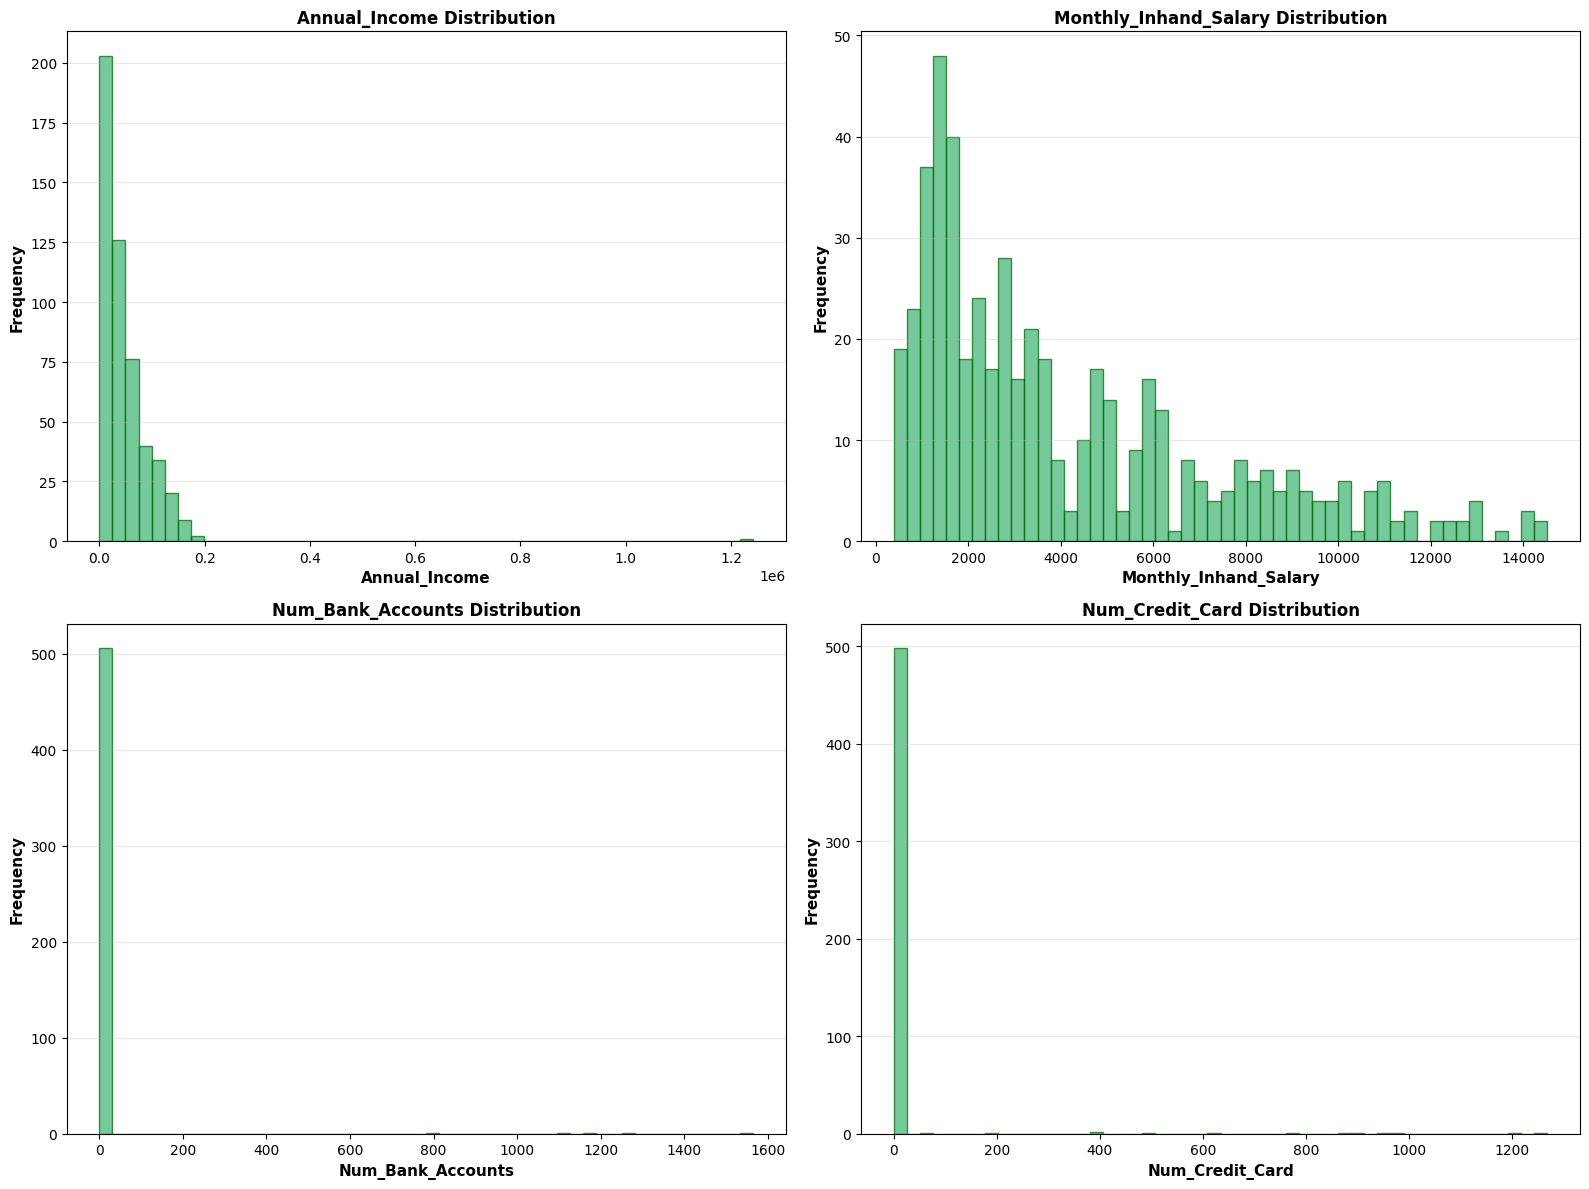


  📊 Saved: 03_financial_metrics_distributions.png

Top Financial Metric Correlations:


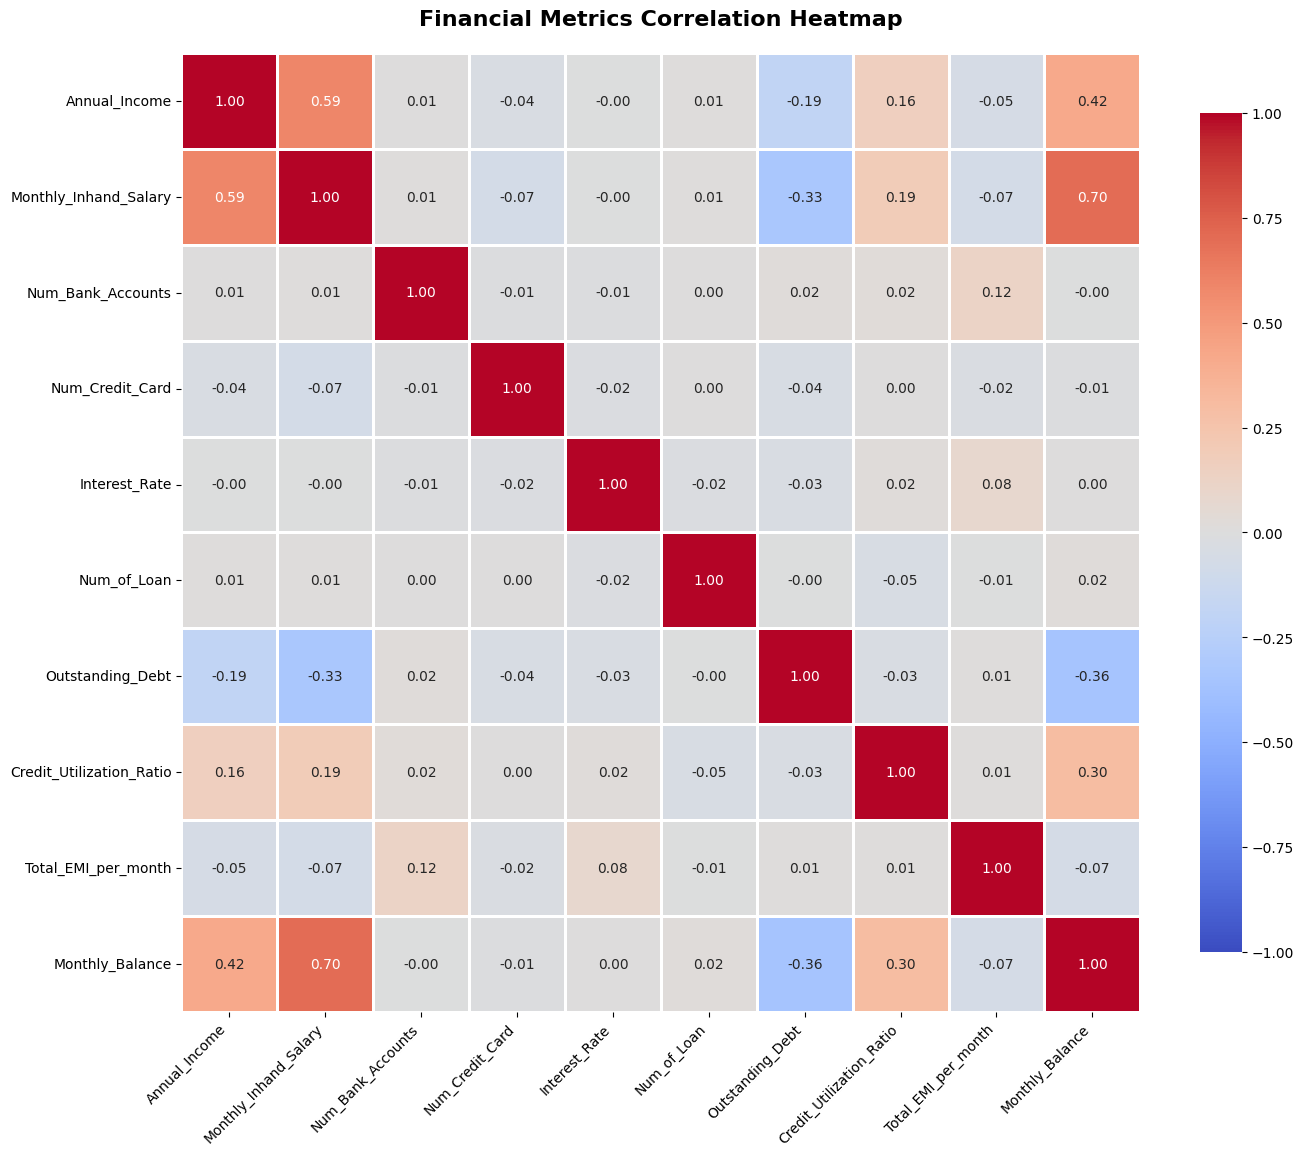

  📊 Saved: 04_financial_correlation_heatmap.png
  Monthly_Inhand_Salary vs Monthly_Balance: 0.697
  Annual_Income vs Monthly_Inhand_Salary: 0.587
  Annual_Income vs Monthly_Balance: 0.417
  Outstanding_Debt vs Monthly_Balance: -0.358
  Monthly_Inhand_Salary vs Outstanding_Debt: -0.335

CLICKSTREAM FEATURE ANALYSIS
Found 20 clickstream features

Average Clickstream Activities:
  fe_1: 100.43
  fe_2: 102.40
  fe_3: 103.31
  fe_4: 106.61
  fe_5: 107.81
  fe_6: 101.50
  fe_7: 107.30
  fe_8: 111.65
  fe_9: 112.85
  fe_10: 116.36

Top 5 Most Common Activities:
  fe_10: 1,044,213 total actions
  fe_9: 1,012,698 total actions
  fe_8: 1,001,941 total actions
  fe_5: 967,459 total actions
  fe_7: 962,875 total actions


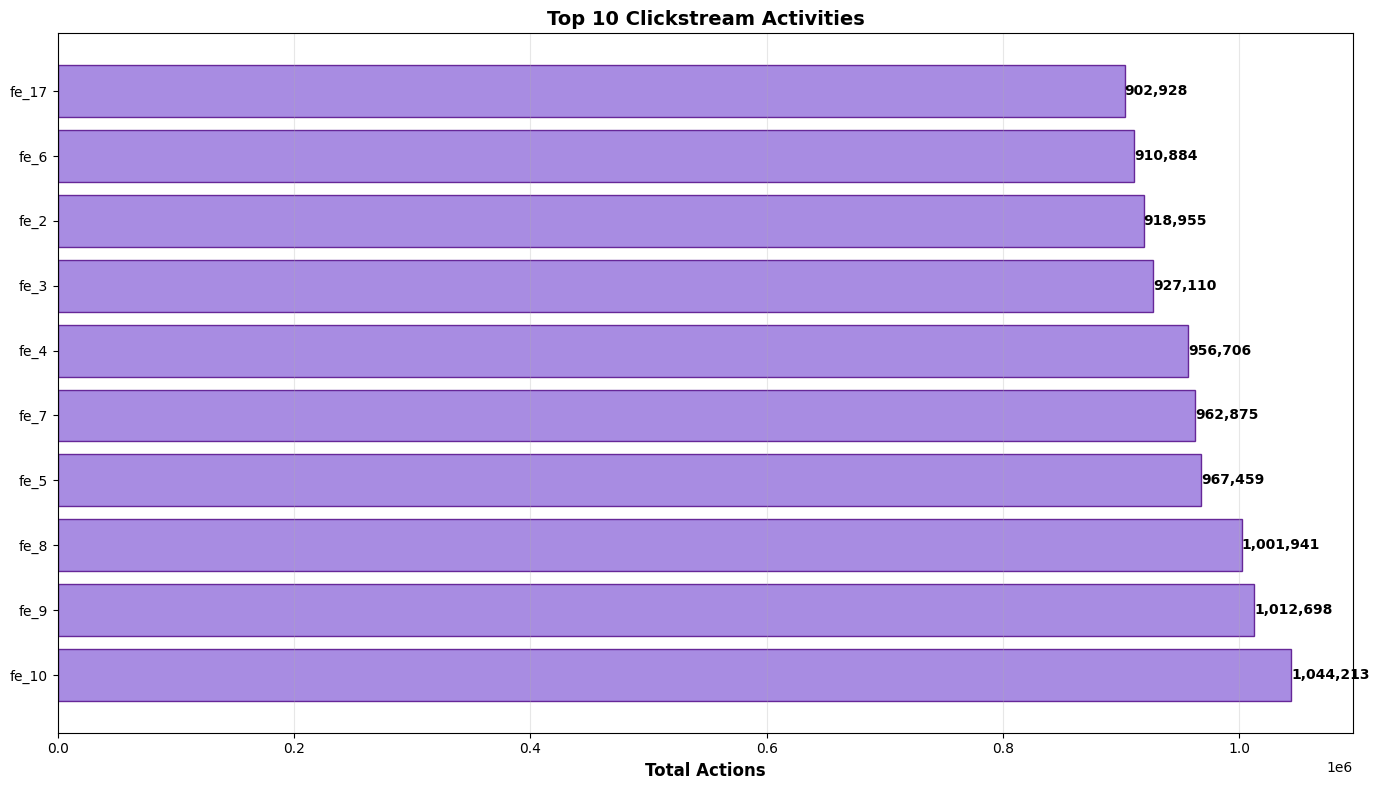


  📊 Saved: 05_top_clickstream_activities.png


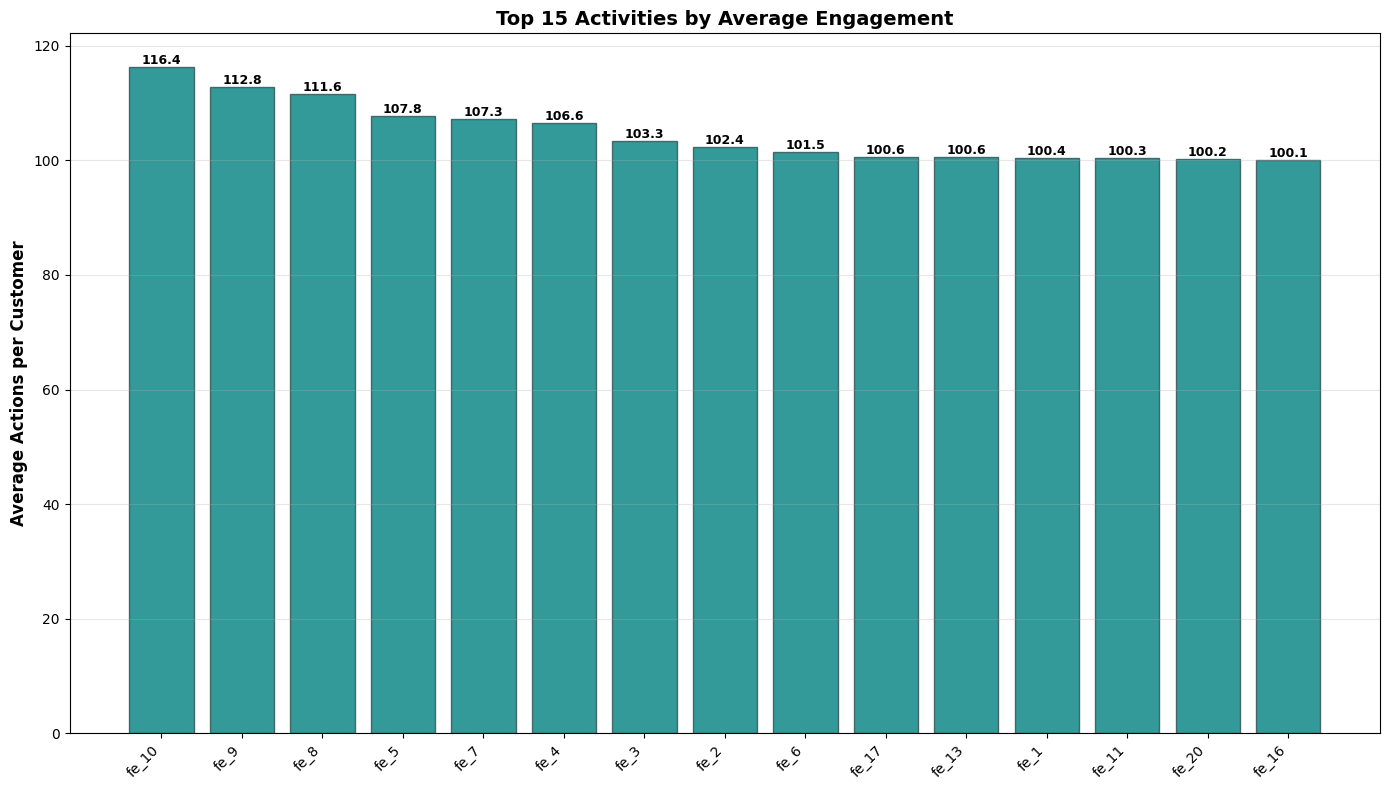

  📊 Saved: 06_activity_engagement.png

CUSTOMER ATTRIBUTES ANALYSIS
Total customers: 511

SSN Analysis:
  Unique SSNs: 480
  Total Customers: 511
  SSN Uniqueness: 93.9%

Categorical Attributes (2 found):

  Name: 505 distinct values

  Occupation: 16 distinct values

  📊 Saved: 07_customer_attributes.png
  📊 Saved: 08_age_distribution.png

FEATURE ENGINEERING RECOMMENDATIONS

FINANCIAL RATIOS:
  ✓ Create: emi_burden_ratio = Total_EMI_per_month / Monthly_Inhand_Salary
  ✓ Create: debt_service_ratio = Outstanding_Debt / Annual_Income
  ✓ Keep: Credit_Utilization_Ratio (important credit metric)

BEHAVIORAL FEATURES:
  ✓ Found 20 clickstream features
  ✓ Consider: total_engagement = sum of all click activities
  ✓ Consider: activity_diversity = count of non-zero features
  ✓ Consider: favorite_action = most frequent activity type

SEGMENTATION FEATURES:
  ✓ Use: Occupation for customer segmentation
  ✓ Consider: Age bins (young, middle, senior)
  ✓ Consider: Income categories (low, medium

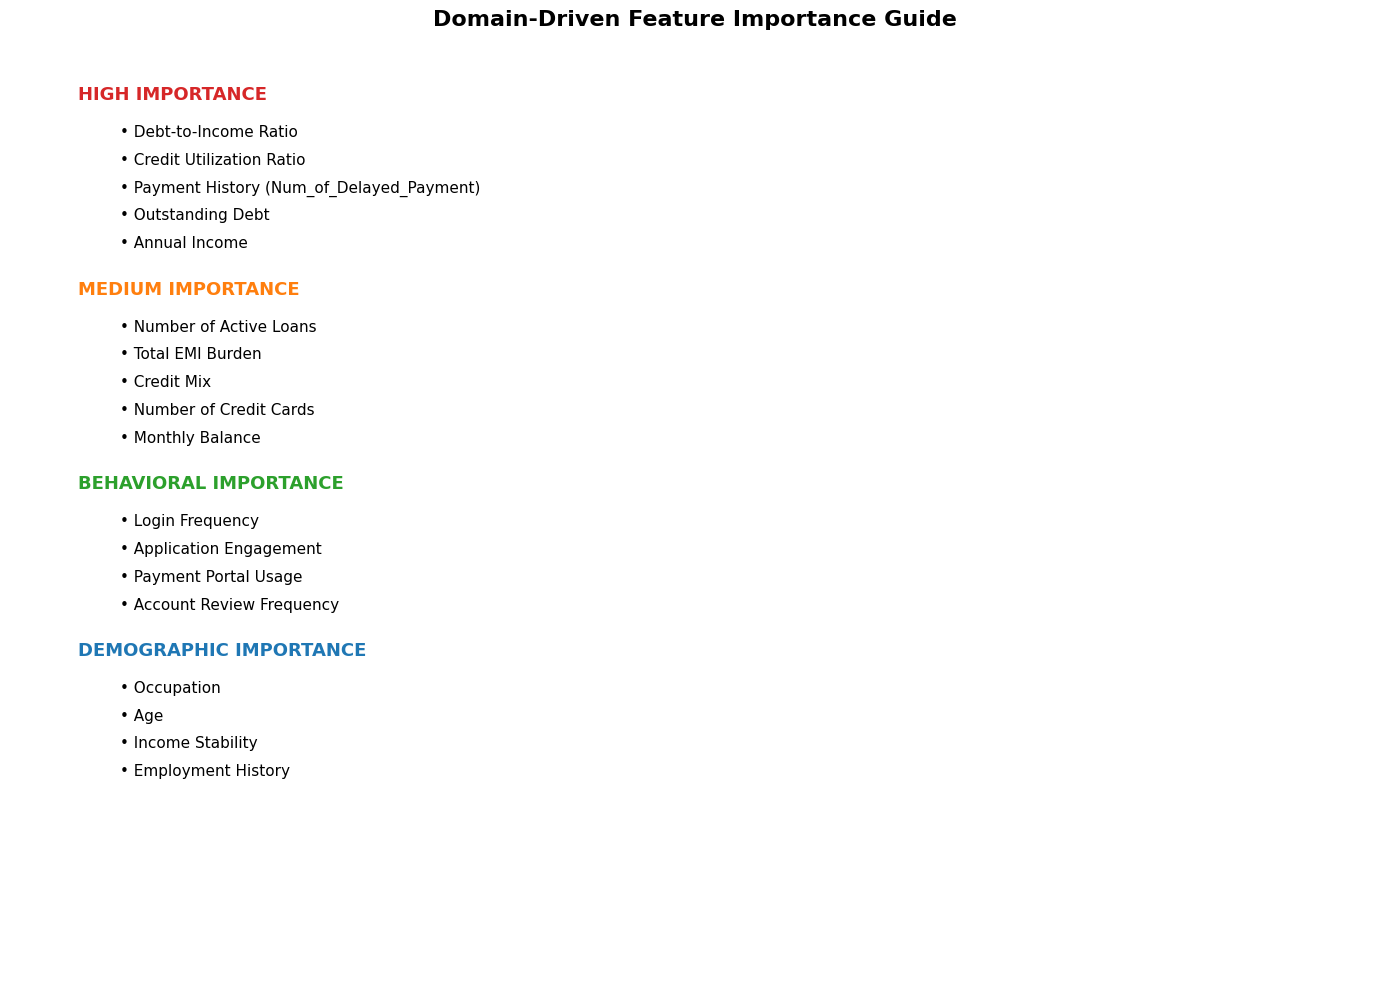


  📊 Saved: 10_feature_importance_guide.png

Feature engineering plan saved: feature_engineering_insights/feature_engineering_plan.txt

MOB vs BAD RATE ANALYSIS (DPD 30+)
Found 48 LMS files
Loaded sample LMS data: (530, 15)
  📊 Saved: 11_mob_bad_rate.png


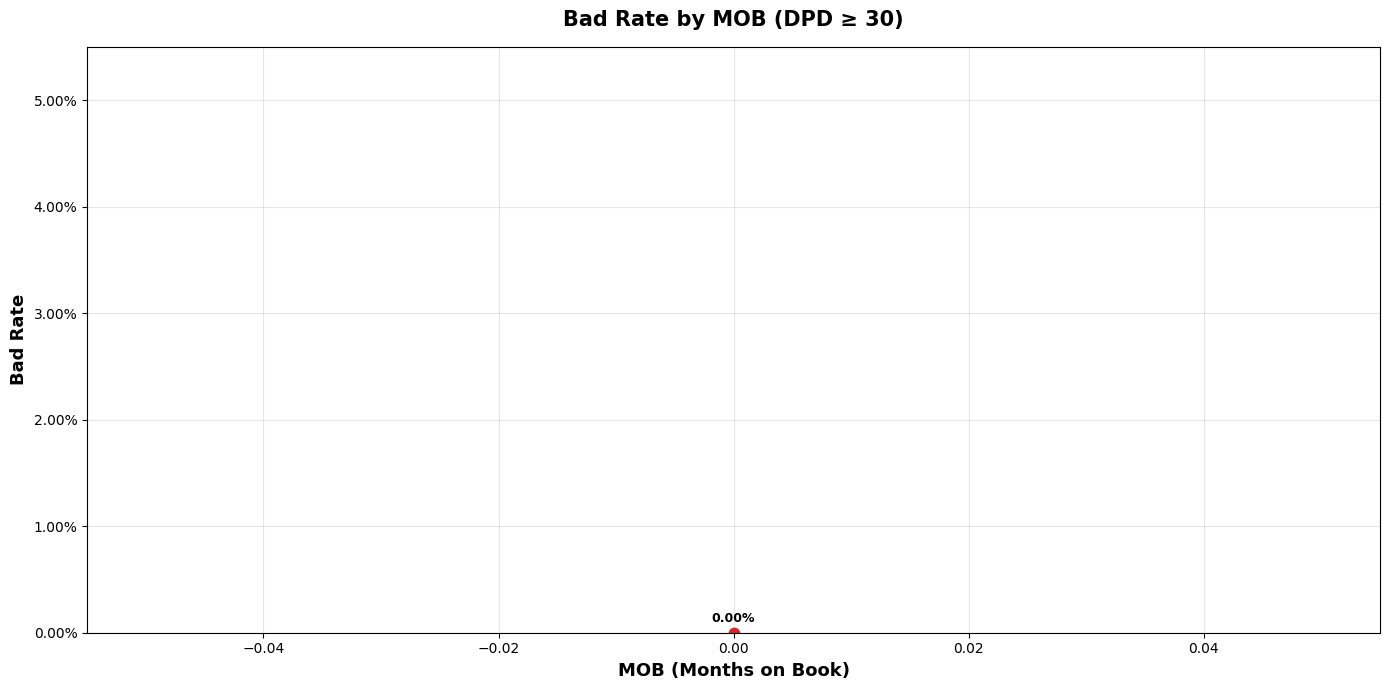


FEATURE ENGINEERING EDA COMPLETE!

📊 VISUALIZATIONS GENERATED:
  ✓ 01_loan_amount_distribution.png
  ✓ 02_tenure_distribution.png
  ✓ 03_financial_metrics_distributions.png
  ✓ 04_financial_correlation_heatmap.png
  ✓ 05_top_clickstream_activities.png
  ✓ 06_activity_engagement.png
  ✓ 07_customer_attributes.png
  ✓ 08_age_distribution.png
  ✓ 09_feature_engineering_summary.png
  ✓ 10_feature_importance_guide.png
  ✓ 11_mob_bad_rate.png

Next steps:
1. Review the feature engineering recommendations above
2. Use the visualizations in your presentation slides
3. Implement the suggested features in your gold layer processing
4. Validate feature importance with actual model training
5. All files saved in: feature_engineering_insights/


In [1]:
def analyze_customer_attributes(df_attributes):
    """Analyze customer demographic and attribute data"""
    print("\n" + "="*50)
    print("CUSTOMER ATTRIBUTES ANALYSIS")
    print("="*50)
    
    if df_attributes is None or df_attributes.empty:
        print("No attributes data available")
        return None
    
    print(f"Total customers: {len(df_attributes):,}")
    
    # Check for SSN consistency
    if 'SSN' in df_attributes.columns:
        ssn_count = df_attributes['SSN'].nunique()
        total_customers = len(df_attributes)
        print(f"\nSSN Analysis:")
        print(f"  Unique SSNs: {ssn_count}")
        print(f"  Total Customers: {total_customers}")
        if total_customers > 0:
            print(f"  SSN Uniqueness: {(ssn_count/total_customers*100):.1f}%")
    
    # Analyze categorical attributes
    categorical_cols = df_attributes.select_dtypes(include=['object']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col not in ['Customer_ID', 'snapshot_date', 'SSN']]
    
    if categorical_cols:
        print(f"\nCategorical Attributes ({len(categorical_cols)} found):")
        
        # VISUALIZATION 7: Categorical Distributions
        num_cats = min(4, len(categorical_cols))
        if num_cats > 0:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.flatten()
            
            for idx, cat_col in enumerate(categorical_cols[:4]):
                try:
                    distinct_count = df_attributes[cat_col].nunique()
                    print(f"\n  {cat_col}: {distinct_count} distinct values")
                    
                    if distinct_count <= 15:  # Only plot if reasonable number of categories
                        value_counts = df_attributes[cat_col].value_counts().head(10)
                        
                        axes[idx].barh(range(len(value_counts)), value_counts.values,
                                      color='salmon', edgecolor='darkred', alpha=0.8)
                        axes[idx].set_yticks(range(len(value_counts)))
                        axes[idx].set_yticklabels(value_counts.index)
                        axes[idx].set_xlabel('Count', fontsize=11, fontweight='bold')
                        axes[idx].set_title(f'{cat_col} Distribution', fontsize=12, fontweight='bold')
                        axes[idx].grid(axis='x', alpha=0.3)
                        
                        # Add value labels
                        for i, val in enumerate(value_counts.values):
                            axes[idx].text(val, i, f' {val:,}', va='center', fontweight='bold')
                        
                        if distinct_count <= 10:
                            print(f"    Value distribution:")
                            for value, count in value_counts.head(5).items():
                                print(f"      {value}: {count}")
                    else:
                        axes[idx].text(0.5, 0.5, f'{cat_col}\n{distinct_count} unique values\n(Too many to display)',
                                      ha='center', va='center', fontsize=12, transform=axes[idx].transAxes)
                        axes[idx].axis('off')
                        
                except Exception as e:
                    print(f"  Error processing {cat_col}: {e}")
                    continue
            
            # Hide unused subplots
            for idx in range(num_cats, 4):
                axes[idx].axis('off')
            
            plt.tight_layout()
            plt.savefig(f'{OUTPUT_DIR}07_customer_attributes.png', dpi=300, bbox_inches='tight')
            plt.show()  # Display inline
            print(f"\n  📊 Saved: 07_customer_attributes.png")
            plt.close()
    
    # VISUALIZATION 8: Age Distribution (if Age column exists)
    if 'Age' in df_attributes.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram
        axes[0].hist(df_attributes['Age'].dropna(), bins=30, color='gold', 
                    edgecolor='darkorange', alpha=0.7)
        axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
        axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
        axes[0].grid(axis='y', alpha=0.3)
        
        # Age groups
        age_bins = [0, 25, 35, 45, 55, 65, 100]
        age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
        df_attributes['Age_Group'] = pd.cut(df_attributes['Age'], bins=age_bins, labels=age_labels)
        age_group_counts = df_attributes['Age_Group'].value_counts().sort_index()
        
        bars = axes[1].bar(range(len(age_group_counts)), age_group_counts.values,
                          color='lightcoral', edgecolor='darkred', alpha=0.8)
        axes[1].set_xticks(range(len(age_group_counts)))
        axes[1].set_xticklabels(age_group_counts.index)
        axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
        axes[1].set_title('Age Group Distribution', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}08_age_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"  📊 Saved: 08_age_distribution.png")
        plt.close()
    
    return df_attributes 

    def generate_feature_engineering_recommendations(df_loans, df_financials, df_clickstream, df_attributes):
        """Generate specific feature engineering recommendations"""
    print("\n" + "="*80)
    print("FEATURE ENGINEERING RECOMMENDATIONS")
    print("="*80)
    
    recommendations = []
    
    # 1. Loan-based feature recommendations
    if df_loans is not None and not df_loans.empty:
        recommendations.append("\nLOAN FEATURES:")
        recommendations.append("  ✓ Keep: loan_amt, tenure (good base features)")
        recommendations.append("  ✓ Consider: loan_amt / tenure (monthly payment equivalent)")
        recommendations.append("  ✓ Consider: loan_amt squared (non-linear relationship)")
    
    # 2. Financial ratio recommendations
    if df_financials is not None and not df_financials.empty:
        recommendations.append("\nFINANCIAL RATIOS:")
        
        cols = df_financials.columns.tolist()
        if 'Annual_Income' in cols and 'loan_amt' in cols:
            recommendations.append("  ✓ Create: debt_to_income = loan_amt / Annual_Income")
        
        if 'Total_EMI_per_month' in cols and 'Monthly_Inhand_Salary' in cols:
            recommendations.append("  ✓ Create: emi_burden_ratio = Total_EMI_per_month / Monthly_Inhand_Salary")
        
        if 'Outstanding_Debt' in cols and 'Annual_Income' in cols:
            recommendations.append("  ✓ Create: debt_service_ratio = Outstanding_Debt / Annual_Income")
        
        if 'Credit_Utilization_Ratio' in cols:
            recommendations.append("  ✓ Keep: Credit_Utilization_Ratio (important credit metric)")
    
    # 3. Behavioral feature recommendations
    if df_clickstream is not None and not df_clickstream.empty:
        recommendations.append("\nBEHAVIORAL FEATURES:")
        click_cols = [col for col in df_clickstream.columns 
                     if col not in ['Customer_ID', 'snapshot_date']]
        
        if click_cols:
            recommendations.append(f"  ✓ Found {len(click_cols)} clickstream features")
            recommendations.append("  ✓ Consider: total_engagement = sum of all click activities")
            recommendations.append("  ✓ Consider: activity_diversity = count of non-zero features")
            recommendations.append("  ✓ Consider: favorite_action = most frequent activity type")
    
    # 4. Customer segmentation recommendations
    if df_attributes is not None and not df_attributes.empty:
        recommendations.append("\nSEGMENTATION FEATURES:")
        recommendations.append("  ✓ Use: Occupation for customer segmentation")
        recommendations.append("  ✓ Consider: Age bins (young, middle, senior)")
        recommendations.append("  ✓ Consider: Income categories (low, medium, high)")
    
    # 5. Cross-feature interactions
    recommendations.append("\nFEATURE INTERACTIONS:")
    recommendations.append("  ✓ Consider: loan_amt * Credit_Utilization_Ratio")
    recommendations.append("  ✓ Consider: tenure * Interest_Rate")
    recommendations.append("  ✓ Consider: Age * Num_Credit_Card")
    
    # Print all recommendations
    for rec in recommendations:
        print(rec)
    
    # VISUALIZATION 9: Feature Engineering Summary
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axis('off')
    
    summary_text = """
    FEATURE ENGINEERING RECOMMENDATIONS SUMMARY
    
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    
    📊 LOAN FEATURES
       • Keep: loan_amt, tenure as base features
       • Create: monthly_payment = loan_amt / tenure
       • Create: loan_amt_squared for non-linear patterns
    
    💰 FINANCIAL RATIOS (High Priority)
       • debt_to_income = loan_amt / Annual_Income
       • emi_burden_ratio = Total_EMI / Monthly_Salary
       • debt_service_ratio = Outstanding_Debt / Annual_Income
       • Keep: Credit_Utilization_Ratio (critical metric)
    
    🖱️ BEHAVIORAL FEATURES
       • total_engagement = sum(all clickstream activities)
       • activity_diversity = count(non-zero features)
       • favorite_action = most frequent activity
       • engagement_rate = actions / time_period
    
    👥 SEGMENTATION FEATURES
       • Age groups: <25, 25-34, 35-44, 45-54, 55-64, 65+
       • Income categories: Low, Medium, High
       • Occupation-based segments
       • Customer lifecycle stage
    
    🔗 FEATURE INTERACTIONS
       • loan_amt × Credit_Utilization_Ratio
       • tenure × Interest_Rate
       • Age × Num_Credit_Card
       • Income × Debt_Level
    
    ⚙️ TRANSFORMATIONS
       • Log transform: loan_amt, Annual_Income (if skewed)
       • Standardization: All numerical features
       • One-hot encoding: Categorical variables
       • Binning: Continuous variables into categories
    
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    """
    
    ax.text(0.05, 0.95, summary_text, transform=ax.transAxes,
           fontsize=11, verticalalignment='top', fontfamily='monospace',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}09_feature_engineering_summary.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display inline
    print(f"\n  📊 Saved: 09_feature_engineering_summary.png")
    plt.close()
    
    return recommendations

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("FEATURE ENGINEERING SUPPORT EDA")
print("="*80)

# ============================================================================
# CONFIGURATION
# ============================================================================
SILVER_BASE_DIR = "datamart/silver/"
OUTPUT_DIR = "feature_engineering_insights/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ============================================================================
# FEATURE-SPECIFIC ANALYSIS FUNCTIONS
# ============================================================================

def analyze_loan_features(df_loans):
    """Analyze loan features for MOB=0 data"""
    print("\n" + "="*50)
    print("LOAN FEATURE ANALYSIS (MOB=0)")
    print("="*50)
    
    if df_loans is None or df_loans.empty:
        print("No loan data available")
        return None
    
    # Basic loan statistics
    print(f"Total loans: {len(df_loans):,}")
    
    # Loan amount analysis
    if 'loan_amt' in df_loans.columns:
        print(f"\nLoan Amount Statistics:")
        print(f"  Average: ${df_loans['loan_amt'].mean():,.2f}")
        print(f"  Std Dev: ${df_loans['loan_amt'].std():,.2f}")
        print(f"  Range: ${df_loans['loan_amt'].min():,.2f} - ${df_loans['loan_amt'].max():,.2f}")
        
        # VISUALIZATION 1: Loan Amount Distribution
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram
        axes[0].hist(df_loans['loan_amt'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0].set_xlabel('Loan Amount ($)', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
        axes[0].set_title('Loan Amount Distribution', fontsize=14, fontweight='bold')
        axes[0].grid(axis='y', alpha=0.3)
        
        # Box plot
        axes[1].boxplot(df_loans['loan_amt'], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='steelblue'),
                       medianprops=dict(color='red', linewidth=2))
        axes[1].set_ylabel('Loan Amount ($)', fontsize=12, fontweight='bold')
        axes[1].set_title('Loan Amount Box Plot', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}01_loan_amount_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"  📊 Saved: 01_loan_amount_distribution.png")
        plt.close()
    
    # Tenure distribution
    if 'tenure' in df_loans.columns:
        tenure_counts = df_loans['tenure'].value_counts().sort_index()
        print(f"\nTenure Distribution:")
        for tenure, count in tenure_counts.items():
            print(f"  {tenure} months: {count} loans")
        
        # VISUALIZATION 2: Tenure Distribution
        fig, ax = plt.subplots(figsize=(12, 6))
        bars = ax.bar(tenure_counts.index, tenure_counts.values, color='coral', edgecolor='darkred', alpha=0.8)
        ax.set_xlabel('Tenure (Months)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of Loans', fontsize=12, fontweight='bold')
        ax.set_title('Loan Tenure Distribution', fontsize=14, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}02_tenure_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"  📊 Saved: 02_tenure_distribution.png")
        plt.close()
    
    return df_loans

def analyze_financial_features(df_financials):
    """Analyze financial features for feature engineering"""
    print("\n" + "="*50)
    print("FINANCIAL FEATURE ANALYSIS")
    print("="*50)
        
    if df_financials is None or df_financials.empty:
        print("No financial data available")
        return None
    
    # Key financial ratios and metrics
    financial_metrics = [
        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt',
        'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance'
    ]
    
    available_metrics = [metric for metric in financial_metrics if metric in df_financials.columns]
    
    if not available_metrics:
        print("No financial metrics found in data")
        return df_financials
    
    print(f"\nFinancial Metrics Summary ({len(available_metrics)} metrics found):")
    for metric in available_metrics:
        print(f"\n{metric}:")
        print(f"  Avg: {df_financials[metric].mean():.2f}")
        print(f"  Std: {df_financials[metric].std():.2f}")
        print(f"  Range: {df_financials[metric].min():.2f} - {df_financials[metric].max():.2f}")
    
    # VISUALIZATION 3: Financial Metrics Overview
    if len(available_metrics) >= 4:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        for idx, metric in enumerate(available_metrics[:4]):
            axes[idx].hist(df_financials[metric].dropna(), bins=50, color='mediumseagreen', 
                          edgecolor='darkgreen', alpha=0.7)
            axes[idx].set_xlabel(metric, fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
            axes[idx].set_title(f'{metric} Distribution', fontsize=12, fontweight='bold')
            axes[idx].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}03_financial_metrics_distributions.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"\n  📊 Saved: 03_financial_metrics_distributions.png")
        plt.close()
    
    # Analyze correlations between financial metrics
    if len(available_metrics) >= 2:
        print(f"\nTop Financial Metric Correlations:")
        corr_matrix = df_financials[available_metrics].corr()
        
        # VISUALIZATION 4: Correlation Heatmap
        fig, ax = plt.subplots(figsize=(14, 12))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                   square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                   vmin=-1, vmax=1, ax=ax)
        ax.set_title('Financial Metrics Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}04_financial_correlation_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"  📊 Saved: 04_financial_correlation_heatmap.png")
        plt.close()
        
        # Get upper triangle of correlation matrix
        corr_pairs = []
        for i in range(len(available_metrics)):
            for j in range(i+1, len(available_metrics)):
                col1, col2 = available_metrics[i], available_metrics[j]
                corr_val = corr_matrix.loc[col1, col2]
                if not pd.isna(corr_val):
                    corr_pairs.append((col1, col2, abs(corr_val), corr_val))
        
        # Get top 5 highest correlations
        if corr_pairs:
            top_correlations = sorted(corr_pairs, key=lambda x: x[2], reverse=True)[:5]
            for col1, col2, _, corr_val in top_correlations:
                print(f"  {col1} vs {col2}: {corr_val:.3f}")
    
    return df_financials

def analyze_clickstream_features(df_clickstream):
    """Analyze clickstream features for behavioral patterns"""
    print("\n" + "="*50)
    print("CLICKSTREAM FEATURE ANALYSIS")
    print("="*50)
    
    if df_clickstream is None or df_clickstream.empty:
        print("No clickstream data available")
        return None
    
    # Get clickstream columns (excluding IDs and dates)
    click_cols = [col for col in df_clickstream.columns 
                  if col not in ['Customer_ID', 'snapshot_date'] 
                  and df_clickstream[col].dtype in ['int64', 'float64']]
    
    print(f"Found {len(click_cols)} clickstream features")
    
    if not click_cols:
        print("No numeric clickstream features found")
        return df_clickstream
    
    # Summary of clickstream activities
    print("\nAverage Clickstream Activities:")
    for col in click_cols[:10]:  # Show first 10 for brevity
        avg_val = df_clickstream[col].mean()
        print(f"  {col}: {avg_val:.2f}")
    
    # Identify most common activities
    try:
        total_clicks = df_clickstream[click_cols].sum()
        sorted_activities = total_clicks.sort_values(ascending=False)
        
        print(f"\nTop 5 Most Common Activities:")
        for col, total in sorted_activities.head(5).items():
            print(f"  {col}: {total:,.0f} total actions")
        
        # VISUALIZATION 5: Top Clickstream Activities
        fig, ax = plt.subplots(figsize=(14, 8))
        top_10 = sorted_activities.head(10)
        bars = ax.barh(range(len(top_10)), top_10.values, color='mediumpurple', 
                       edgecolor='indigo', alpha=0.8)
        ax.set_yticks(range(len(top_10)))
        ax.set_yticklabels(top_10.index)
        ax.set_xlabel('Total Actions', fontsize=12, fontweight='bold')
        ax.set_title('Top 10 Clickstream Activities', fontsize=14, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2.,
                   f'{int(width):,}', ha='left', va='center', fontweight='bold', fontsize=10)
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}05_top_clickstream_activities.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"\n  📊 Saved: 05_top_clickstream_activities.png")
        plt.close()
        
        # VISUALIZATION 6: Activity Engagement Distribution
        avg_clicks = df_clickstream[click_cols].mean().sort_values(ascending=False)
        
        fig, ax = plt.subplots(figsize=(14, 8))
        top_15 = avg_clicks.head(15)
        bars = ax.bar(range(len(top_15)), top_15.values, color='teal', 
                      edgecolor='darkslategray', alpha=0.8)
        ax.set_xticks(range(len(top_15)))
        ax.set_xticklabels(top_15.index, rotation=45, ha='right')
        ax.set_ylabel('Average Actions per Customer', fontsize=12, fontweight='bold')
        ax.set_title('Top 15 Activities by Average Engagement', fontsize=14, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}06_activity_engagement.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display inline
        print(f"  📊 Saved: 06_activity_engagement.png")
        plt.close()
        
    except Exception as e:
        print(f"\nCould not compute total activities: {e}")
    
    return df_clickstream

def analyze_customer_attributes(df_attributes):
    """Analyze customer demographic and attribute data"""
    print("\n" + "="*50)
    print("CUSTOMER ATTRIBUTES ANALYSIS")
    print("="*50)
    
    if df_attributes is None or df_attributes.empty:
        print("No attributes data available")
        return None
    
    print(f"Total customers: {len(df_attributes):,}")
    
    # Check for SSN consistency
    if 'SSN' in df_attributes.columns:
        ssn_count = df_attributes['SSN'].nunique()
        total_customers = len(df_attributes)
        print(f"\nSSN Analysis:")
        print(f"  Unique SSNs: {ssn_count}")
        print(f"  Total Customers: {total_customers}")
        if total_customers > 0:
            print(f"  SSN Uniqueness: {(ssn_count/total_customers*100):.1f}%")
    
    # Analyze categorical attributes
    categorical_cols = df_attributes.select_dtypes(include=['object']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col not in ['Customer_ID', 'snapshot_date', 'SSN']]
    
    if categorical_cols:
        print(f"\nCategorical Attributes ({len(categorical_cols)} found):")
        
        # VISUALIZATION 7: Categorical Distributions
        num_cats = min(4, len(categorical_cols))
        if num_cats > 0:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.flatten()
            
            for idx, cat_col in enumerate(categorical_cols[:4]):
                try:
                    distinct_count = df_attributes[cat_col].nunique()
                    print(f"\n  {cat_col}: {distinct_count} distinct values")
                    
                    if distinct_count <= 15:  # Only plot if reasonable number of categories
                        value_counts = df_attributes[cat_col].value_counts().head(10)
                        
                        axes[idx].barh(range(len(value_counts)), value_counts.values,
                                      color='salmon', edgecolor='darkred', alpha=0.8)
                        axes[idx].set_yticks(range(len(value_counts)))
                        axes[idx].set_yticklabels(value_counts.index)
                        axes[idx].set_xlabel('Count', fontsize=11, fontweight='bold')
                        axes[idx].set_title(f'{cat_col} Distribution', fontsize=12, fontweight='bold')
                        axes[idx].grid(axis='x', alpha=0.3)
                        
                        # Add value labels
                        for i, val in enumerate(value_counts.values):
                            axes[idx].text(val, i, f' {val:,}', va='center', fontweight='bold')
                        
                        if distinct_count <= 10:
                            print(f"    Value distribution:")
                            for value, count in value_counts.head(5).items():
                                print(f"      {value}: {count}")
                    else:
                        axes[idx].text(0.5, 0.5, f'{cat_col}\n{distinct_count} unique values\n(Too many to display)',
                                      ha='center', va='center', fontsize=12, transform=axes[idx].transAxes)
                        axes[idx].axis('off')
                        
                except Exception as e:
                    print(f"  Error processing {cat_col}: {e}")
                    continue
            
            # Hide unused subplots
            for idx in range(num_cats, 4):
                axes[idx].axis('off')
            
            plt.tight_layout()
            plt.savefig(f'{OUTPUT_DIR}07_customer_attributes.png', dpi=300, bbox_inches='tight')
            print(f"\n  📊 Saved: 07_customer_attributes.png")
            plt.close()
    
    # VISUALIZATION 8: Age Distribution (if Age column exists)
    if 'Age' in df_attributes.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram
        axes[0].hist(df_attributes['Age'].dropna(), bins=30, color='gold', 
                    edgecolor='darkorange', alpha=0.7)
        axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
        axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
        axes[0].grid(axis='y', alpha=0.3)
        
        # Age groups
        age_bins = [0, 25, 35, 45, 55, 65, 100]
        age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
        df_attributes['Age_Group'] = pd.cut(df_attributes['Age'], bins=age_bins, labels=age_labels)
        age_group_counts = df_attributes['Age_Group'].value_counts().sort_index()
        
        bars = axes[1].bar(range(len(age_group_counts)), age_group_counts.values,
                          color='lightcoral', edgecolor='darkred', alpha=0.8)
        axes[1].set_xticks(range(len(age_group_counts)))
        axes[1].set_xticklabels(age_group_counts.index)
        axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
        axes[1].set_title('Age Group Distribution', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}08_age_distribution.png', dpi=300, bbox_inches='tight')
        print(f"  📊 Saved: 08_age_distribution.png")
        plt.close()
    
    return df_attributes

def generate_feature_engineering_recommendations(df_loans, df_financials, df_clickstream, df_attributes):
    """Generate specific feature engineering recommendations"""
    print("\n" + "="*80)
    print("FEATURE ENGINEERING RECOMMENDATIONS")
    print("="*80)
    
    recommendations = []
    
    # 1. Loan-based feature recommendations
    if df_loans is not None and not df_loans.empty:
        recommendations.append("\nLOAN FEATURES:")
        recommendations.append("  ✓ Keep: loan_amt, tenure (good base features)")
        recommendations.append("  ✓ Consider: loan_amt / tenure (monthly payment equivalent)")
        recommendations.append("  ✓ Consider: loan_amt squared (non-linear relationship)")
    
    # 2. Financial ratio recommendations
    if df_financials is not None and not df_financials.empty:
        recommendations.append("\nFINANCIAL RATIOS:")
        
        cols = df_financials.columns.tolist()
        if 'Annual_Income' in cols and 'loan_amt' in cols:
            recommendations.append("  ✓ Create: debt_to_income = loan_amt / Annual_Income")
        
        if 'Total_EMI_per_month' in cols and 'Monthly_Inhand_Salary' in cols:
            recommendations.append("  ✓ Create: emi_burden_ratio = Total_EMI_per_month / Monthly_Inhand_Salary")
        
        if 'Outstanding_Debt' in cols and 'Annual_Income' in cols:
            recommendations.append("  ✓ Create: debt_service_ratio = Outstanding_Debt / Annual_Income")
        
        if 'Credit_Utilization_Ratio' in cols:
            recommendations.append("  ✓ Keep: Credit_Utilization_Ratio (important credit metric)")
    
    # 3. Behavioral feature recommendations
    if df_clickstream is not None and not df_clickstream.empty:
        recommendations.append("\nBEHAVIORAL FEATURES:")
        click_cols = [col for col in df_clickstream.columns 
                     if col not in ['Customer_ID', 'snapshot_date']]
        
        if click_cols:
            recommendations.append(f"  ✓ Found {len(click_cols)} clickstream features")
            recommendations.append("  ✓ Consider: total_engagement = sum of all click activities")
            recommendations.append("  ✓ Consider: activity_diversity = count of non-zero features")
            recommendations.append("  ✓ Consider: favorite_action = most frequent activity type")
    
    # 4. Customer segmentation recommendations
    if df_attributes is not None and not df_attributes.empty:
        recommendations.append("\nSEGMENTATION FEATURES:")
        recommendations.append("  ✓ Use: Occupation for customer segmentation")
        recommendations.append("  ✓ Consider: Age bins (young, middle, senior)")
        recommendations.append("  ✓ Consider: Income categories (low, medium, high)")
    
    # 5. Cross-feature interactions
    recommendations.append("\nFEATURE INTERACTIONS:")
    recommendations.append("  ✓ Consider: loan_amt * Credit_Utilization_Ratio")
    recommendations.append("  ✓ Consider: tenure * Interest_Rate")
    recommendations.append("  ✓ Consider: Age * Num_Credit_Card")
    
    # Print all recommendations
    for rec in recommendations:
        print(rec)
    
    return recommendations

def create_feature_importance_guide():
    """Create a guide for feature importance based on domain knowledge"""
    print("\n" + "="*80)
    print("DOMAIN-DRIVEN FEATURE IMPORTANCE GUIDE")
    print("="*80)
    
    feature_guide = {
        "HIGH IMPORTANCE": [
            "Debt-to-Income Ratio",
            "Credit Utilization Ratio", 
            "Payment History (Num_of_Delayed_Payment)",
            "Outstanding Debt",
            "Annual Income"
        ],
        "MEDIUM IMPORTANCE": [
            "Number of Active Loans",
            "Total EMI Burden",
            "Credit Mix",
            "Number of Credit Cards",
            "Monthly Balance"
        ],
        "BEHAVIORAL IMPORTANCE": [
            "Login Frequency",
            "Application Engagement",
            "Payment Portal Usage",
            "Account Review Frequency"
        ],
        "DEMOGRAPHIC IMPORTANCE": [
            "Occupation",
            "Age",
            "Income Stability",
            "Employment History"
        ]
    }
    
    for category, features in feature_guide.items():
        print(f"\n{category}:")
        for feature in features:
            print(f"  • {feature}")
    
    # VISUALIZATION 10: Feature Importance Guide
    fig, ax = plt.subplots(figsize=(14, 10))
    
    y_position = 0.95
    colors = {
        "HIGH IMPORTANCE": '#d62728',
        "MEDIUM IMPORTANCE": '#ff7f0e',
        "BEHAVIORAL IMPORTANCE": '#2ca02c',
        "DEMOGRAPHIC IMPORTANCE": '#1f77b4'
    }
    
    for category, features in feature_guide.items():
        # Category header
        ax.text(0.05, y_position, category, transform=ax.transAxes,
               fontsize=13, fontweight='bold', color=colors[category])
        y_position -= 0.04
        
        # Features
        for feature in features:
            ax.text(0.08, y_position, f"• {feature}", transform=ax.transAxes,
                   fontsize=11, color='black')
            y_position -= 0.03
        
        y_position -= 0.02  # Extra space between categories
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.set_title('Domain-Driven Feature Importance Guide', 
                fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}10_feature_importance_guide.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display inline
    print(f"\n  📊 Saved: 10_feature_importance_guide.png")
    plt.close()

def save_feature_engineering_plan(recommendations):
    """Save the feature engineering plan to a file"""
    plan_file = f"{OUTPUT_DIR}feature_engineering_plan.txt"
    
    with open(plan_file, 'w') as f:
        f.write("FEATURE ENGINEERING IMPLEMENTATION PLAN\n")
        f.write("=" * 50 + "\n\n")
        
        f.write("IMMEDIATE IMPLEMENTATION:\n")
        f.write("1. Financial Ratios:\n")
        f.write("   - debt_to_income = loan_amt / Annual_Income\n")
        f.write("   - emi_burden = Total_EMI_per_month / Monthly_Inhand_Salary\n")
        f.write("   - debt_service_ratio = Outstanding_Debt / Annual_Income\n\n")
        
        f.write("2. Behavioral Features:\n")
        f.write("   - total_engagement = sum(all_clickstream_features)\n")
        f.write("   - activity_diversity = count(non_zero_clickstream)\n\n")
        
        f.write("3. Customer Segmentation:\n")
        f.write("   - age_bins = categorize Age into groups\n")
        f.write("   - income_categories = categorize Annual_Income\n\n")
        
        f.write("RECOMMENDED FEATURE TRANSFORMATIONS:\n")
        f.write("- Log transform: loan_amt, Annual_Income (if skewed)\n")
        f.write("- Standardize: all numerical features before modeling\n")
        f.write("- One-hot encode: Occupation, other categorical variables\n")
    
    print(f"\nFeature engineering plan saved: {plan_file}")

# ============================================================================
# MAIN ANALYSIS
# ============================================================================
def load_and_analyze_mob_bad_rate():
    """Load LMS data and create MOB vs Bad Rate analysis"""
    print("\n" + "="*50)
    print("MOB vs BAD RATE ANALYSIS (DPD 30+)")
    print("="*50)
    
    try:
        # Try to load LMS data
        lms_path = f"{SILVER_BASE_DIR}loans/"
        
        # Find available LMS files
        if os.path.exists(lms_path):
            lms_files = [f for f in os.listdir(lms_path) if f.endswith('.parquet')]
            
            if lms_files:
                print(f"Found {len(lms_files)} LMS files")
                
                # Load first available file for demo
                sample_file = os.path.join(lms_path, lms_files[0])
                lms_df = pd.read_parquet(sample_file)
                print(f"Loaded sample LMS data: {lms_df.shape}")
                
                # Check for required columns
                if 'mob' in lms_df.columns:
                    # Find DPD column
                    dpd_col = None
                    for col in ['dpd', 'DPD', 'days_past_due']:
                        if col in lms_df.columns:
                            dpd_col = col
                            break
                    
                    if dpd_col:
                        # Calculate bad rate by MOB
                        mob_stats = []
                        for mob in sorted(lms_df['mob'].unique()):
                            mob_data = lms_df[lms_df['mob'] == mob]
                            total = len(mob_data)
                            bad = len(mob_data[mob_data[dpd_col] >= 30])
                            bad_rate = bad / total if total > 0 else 0
                            mob_stats.append({'mob': mob, 'bad_rate': bad_rate, 'total': total, 'bad': bad})
                        
                        mob_df = pd.DataFrame(mob_stats)
                        
                        # VISUALIZATION 11: MOB vs Bad Rate
                        fig, ax = plt.subplots(figsize=(14, 7))
                        
                        ax.plot(mob_df['mob'], mob_df['bad_rate'], 
                               marker='o', linewidth=2.5, markersize=10,
                               color='#d62728', markerfacecolor='#d62728',
                               markeredgecolor='white', markeredgewidth=1.5)
                        
                        ax.set_xlabel('MOB (Months on Book)', fontsize=13, fontweight='bold')
                        ax.set_ylabel('Bad Rate', fontsize=13, fontweight='bold')
                        ax.set_title('Bad Rate by MOB (DPD ≥ 30)', fontsize=15, fontweight='bold', pad=15)
                        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2%}'))
                        ax.grid(True, alpha=0.3)
                        ax.set_ylim(bottom=0)
                        
                        # Add value labels
                        for idx, row in mob_df.iterrows():
                            if idx % 2 == 0:
                                ax.annotate(f'{row["bad_rate"]:.2%}',
                                          xy=(row['mob'], row['bad_rate']),
                                          xytext=(0, 8), textcoords='offset points',
                                          ha='center', fontsize=9, fontweight='bold')
                        
                        plt.tight_layout()
                        plt.savefig(f'{OUTPUT_DIR}11_mob_bad_rate.png', dpi=300, bbox_inches='tight')
                        print(f"  📊 Saved: 11_mob_bad_rate.png")
                        plt.show()
                        plt.close()
                        
                        return mob_df
                    else:
                        print("  ⚠️  No DPD column found in LMS data")
                else:
                    print("  ⚠️  No MOB column found in LMS data")
            else:
                print("  ⚠️  No LMS parquet files found")
        else:
            print(f"  ⚠️  LMS directory not found: {lms_path}")
    
    except Exception as e:
        print(f"  ⚠️  Could not load LMS data: {str(e)}")
    
    return None

def main():
    print("\nLoading data from silver layer...")
    
    # Load sample data from latest available date
    dates = ["2024_03_01", "2024_02_01", "2024_01_01"]
    
    df_loans = df_financials = df_clickstream = df_attributes = None
    
    for date_str in dates:
        print(f"\nTrying date: {date_str}")
        
        # Try loading loans
        try:
            path = f"{SILVER_BASE_DIR}loans_mob0/silver_loans_mob0_{date_str}.parquet"
            if os.path.exists(path):
                df_loans = pd.read_parquet(path)
                print(f"  ✓ Loaded loans data ({len(df_loans)} rows)")
        except Exception as e:
            print(f"  ✗ Could not load loans: {str(e)}")
        
        # Try loading financials
        try:
            path = f"{SILVER_BASE_DIR}financials/silver_financials_{date_str}.parquet"
            if os.path.exists(path):
                df_financials = pd.read_parquet(path)
                print(f"  ✓ Loaded financials data ({len(df_financials)} rows)")
        except Exception as e:
            print(f"  ✗ Could not load financials: {str(e)}")
        
        # Try loading clickstream
        try:
            path = f"{SILVER_BASE_DIR}clickstream/silver_clickstream_{date_str}.parquet"
            if os.path.exists(path):
                df_clickstream = pd.read_parquet(path)
                print(f"  ✓ Loaded clickstream data ({len(df_clickstream)} rows)")
        except Exception as e:
            print(f"  ✗ Could not load clickstream: {str(e)}")
        
        # Try loading attributes
        try:
            path = f"{SILVER_BASE_DIR}attributes/silver_attributes_{date_str}.parquet"
            if os.path.exists(path):
                df_attributes = pd.read_parquet(path)
                print(f"  ✓ Loaded attributes data ({len(df_attributes)} rows)")
        except Exception as e:
            print(f"  ✗ Could not load attributes: {str(e)}")
        
        # Break if we found at least one dataset
        if any([df is not None for df in [df_loans, df_financials, df_clickstream, df_attributes]]):
            break
    
    # Check if any data was loaded
    if all([df is None for df in [df_loans, df_financials, df_clickstream, df_attributes]]):
        print("\n⚠ WARNING: No data files found!")
        print(f"Please check that parquet files exist in: {SILVER_BASE_DIR}")
        return
    
    # Run analyses
    analyze_loan_features(df_loans)
    analyze_financial_features(df_financials)
    analyze_clickstream_features(df_clickstream)
    analyze_customer_attributes(df_attributes)
    
    # Generate recommendations
    recommendations = generate_feature_engineering_recommendations(
        df_loans, df_financials, df_clickstream, df_attributes
    )
    
    # Create guides and plans
    create_feature_importance_guide()
    save_feature_engineering_plan(recommendations)
    
    # Add MOB vs Bad Rate analysis
    mob_df = load_and_analyze_mob_bad_rate()
    
    print("\n" + "="*80)
    print("FEATURE ENGINEERING EDA COMPLETE!")
    print("="*80)
    print("\n📊 VISUALIZATIONS GENERATED:")
    print("  ✓ 01_loan_amount_distribution.png")
    print("  ✓ 02_tenure_distribution.png")
    print("  ✓ 03_financial_metrics_distributions.png")
    print("  ✓ 04_financial_correlation_heatmap.png")
    print("  ✓ 05_top_clickstream_activities.png")
    print("  ✓ 06_activity_engagement.png")
    print("  ✓ 07_customer_attributes.png")
    print("  ✓ 08_age_distribution.png")
    print("  ✓ 09_feature_engineering_summary.png")
    print("  ✓ 10_feature_importance_guide.png")
    if mob_df is not None:
        print("  ✓ 11_mob_bad_rate.png")
    print("\nNext steps:")
    print("1. Review the feature engineering recommendations above")
    print("2. Use the visualizations in your presentation slides")
    print("3. Implement the suggested features in your gold layer processing")
    print("4. Validate feature importance with actual model training")
    print(f"5. All files saved in: {OUTPUT_DIR}")

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"\n❌ Error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

print("=" * 70)
print("MOB vs BAD RATE ANALYSIS (DPD 30+)")
print("=" * 70)

# =============================================================================
# CONFIGURATION
# =============================================================================

BASE_PATH = r"C:\Users\user\Desktop\A1\lab_2\lab_2\datamart\silver"
DPD_THRESHOLD = 30

# =============================================================================
# LOAD DATA
# =============================================================================

def load_lms_data():
    """Load LMS data from all 24 months (2023-01 to 2024-12)"""
    
    # First, check if the base path exists
    if not os.path.exists(BASE_PATH):
        print(f"\nERROR: Base path does not exist: {BASE_PATH}")
        print("Please check the path and try again.")
        return None
    
    # Check if loans subdirectory exists
    loans_path = os.path.join(BASE_PATH, "loans")
    if not os.path.exists(loans_path):
        print(f"\nERROR: Loans directory does not exist: {loans_path}")
        print(f"Available directories in {BASE_PATH}:")
        try:
            for item in os.listdir(BASE_PATH):
                if os.path.isdir(os.path.join(BASE_PATH, item)):
                    print(f"  - {item}")
        except:
            pass
        return None
    
    # Generate all months from 2023-01 to 2024-12
    months = []
    start_date = pd.Timestamp('2023-01-01')
    end_date = pd.Timestamp('2024-12-01')
    current_date = start_date
    
    while current_date <= end_date:
        month_str = current_date.strftime('%Y_%m_01')
        months.append(month_str)
        current_date += pd.DateOffset(months=1)
    
    print(f"\nLoading LMS data for {len(months)} months (2023-01 to 2024-12)...")
    print("-" * 70)
    
    all_lms = []
    loaded_months = []
    missing_months = []
    
    for month in months:
        try:
            # Try different possible filename patterns
            possible_files = [
                f"{BASE_PATH}/loans/silver_loans_all_{month}.parquet",
                f"{BASE_PATH}/loans/silver_loan_daily_{month}.parquet",
                f"{BASE_PATH}/lms/silver_loan_daily_{month}.parquet",
            ]
            
            loaded = False
            for filepath in possible_files:
                if os.path.exists(filepath):
                    lms = pd.read_parquet(filepath)
                    all_lms.append(lms)
                    loaded_months.append(month)
                    print(f"  ✓ Loaded {month}: {lms.shape[0]:,} rows from {os.path.basename(filepath)}")
                    loaded = True
                    break
            
            if not loaded:
                missing_months.append(month)
                print(f"  ✗ Missing {month}")
                
        except Exception as e:
            missing_months.append(month)
            print(f"  ✗ Error loading {month}: {e}")
    
    if not all_lms:
        print("\nERROR: No data loaded!")
        print("\nPlease check:")
        print("1. The BASE_PATH is correct")
        print("2. The parquet files exist in the subdirectories")
        print("3. The file naming pattern matches what's expected")
        return None
    
    # Combine all months
    lms_df = pd.concat(all_lms, ignore_index=True)
    
    print("-" * 70)
    print(f"✓ Combined LMS data: {lms_df.shape[0]:,} rows x {lms_df.shape[1]} columns")
    print(f"✓ Successfully loaded: {len(loaded_months)} months")
    
    if missing_months:
        print(f"⚠ Missing: {len(missing_months)} months")
    
    # Show basic info
    print(f"\nColumns: {list(lms_df.columns)}")
    print(f"MOB range: {lms_df['mob'].min()} to {lms_df['mob'].max()}")
    print(f"Unique loans: {lms_df['loan_id'].nunique():,}")
    
    return lms_df

# =============================================================================
# CALCULATE BAD RATE BY MOB
# =============================================================================

def calculate_bad_rate_by_mob(lms_df, dpd_threshold=30):
    """
    Calculate bad rate by MOB for a given DPD threshold
    Bad Rate = (Loans with DPD >= threshold) / (Total Loans)
    """
    
    print(f"\nCalculating Bad Rate by MOB (DPD >= {dpd_threshold})...")
    print("-" * 70)
    
    # Check if required columns exist
    if 'mob' not in lms_df.columns:
        print("ERROR: 'mob' column not found!")
        print(f"Available columns: {list(lms_df.columns)}")
        return None
    
    if 'loan_id' not in lms_df.columns:
        print("ERROR: 'loan_id' column not found!")
        print(f"Available columns: {list(lms_df.columns)}")
        return None
    
    # Find the DPD column
    dpd_col = None
    possible_dpd_cols = ['dpd', 'DPD', 'Dpd', 'days_past_due']
    for col in possible_dpd_cols:
        if col in lms_df.columns:
            dpd_col = col
            break
    
    if dpd_col is None:
        print("ERROR: No DPD column found!")
        print(f"Available columns: {list(lms_df.columns)}")
        print("\nPlease check if you need to calculate DPD from other columns")
        return None
    
    print(f"✓ Using DPD column: '{dpd_col}'")
    
    # Check for null values
    null_dpd = lms_df[dpd_col].isna().sum()
    if null_dpd > 0:
        print(f"⚠ Warning: {null_dpd:,} null values in DPD column (will be treated as 0)")
        lms_df[dpd_col] = lms_df[dpd_col].fillna(0)
    
    print()
    
    # Get unique MOB values
    mob_values = sorted(lms_df['mob'].unique())
    print(f"MOB values found: {mob_values}")
    print()
    
    results = []
    
    for mob in mob_values:
        # Filter data for this MOB
        mob_data = lms_df[lms_df['mob'] == mob]
        
        # Total unique loans at this MOB
        total_loans = mob_data['loan_id'].nunique()
        
        # Unique loans that are bad (DPD >= threshold) at this MOB
        bad_loans = mob_data[mob_data[dpd_col] >= dpd_threshold]['loan_id'].nunique()
        
        # Calculate bad rate
        bad_rate = bad_loans / total_loans if total_loans > 0 else 0
        
        results.append({
            'mob': mob,
            'total_loans': total_loans,
            'bad_loans': bad_loans,
            'bad_rate': bad_rate
        })
        
        print(f"  MOB {mob:2d}: {bad_loans:6,} / {total_loans:7,} = {bad_rate:.4f} ({bad_rate*100:.2f}%)")
    
    result_df = pd.DataFrame(results)
    
    # Check if we have any bad loans
    if result_df['bad_loans'].sum() == 0:
        print("\n⚠ WARNING: No bad loans found! Check if DPD threshold is too high.")
    
    return result_df

# =============================================================================
# VISUALIZE MOB vs BAD RATE
# =============================================================================

def plot_mob_bad_rate(bad_rate_df, dpd_threshold=30):
    """Create MOB vs Bad Rate visualization"""
    
    if bad_rate_df is None or len(bad_rate_df) == 0:
        print("ERROR: No data to plot!")
        return None
    
    # Set style (use a valid style)
    try:
        plt.style.use('seaborn-v0_8-whitegrid')
    except:
        plt.style.use('default')
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot line with markers and shadow
    ax.plot(bad_rate_df['mob'], bad_rate_df['bad_rate'], 
            marker='o', linewidth=2.5, markersize=10, 
            color='#2E86AB', markerfacecolor='#2E86AB', 
            markeredgewidth=2, markeredgecolor='white',
            label=f'Bad Rate (DPD ≥ {dpd_threshold})',
            zorder=3)
    
    # Add subtle gradient fill under the curve
    ax.fill_between(bad_rate_df['mob'], 0, bad_rate_df['bad_rate'], 
                     alpha=0.1, color='#2E86AB', zorder=1)
    
    # Labels and title
    ax.set_xlabel('Months on Book (MOB)', fontsize=13, fontweight='500')
    ax.set_ylabel('Bad Rate', fontsize=13, fontweight='500')
    ax.set_title(f'Default Rate Evolution: DPD {dpd_threshold}+', 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Enhanced grid
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color='#CCCCCC', zorder=0)
    ax.set_axisbelow(True)
    
    # Set x-axis
    ax.set_xticks(bad_rate_df['mob'])
    ax.set_xlim(bad_rate_df['mob'].min() - 0.5, bad_rate_df['mob'].max() + 0.5)
    
    # Set y-axis
    max_rate = bad_rate_df['bad_rate'].max()
    if max_rate > 0:
        ax.set_ylim(0, max_rate * 1.1)
    else:
        ax.set_ylim(0, 0.1)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
    
    # Add value labels at key points (first, stabilization, last)
    first_idx = 0
    last_idx = len(bad_rate_df) - 1
    
    # Find stabilization point
    stab_idx = None
    if len(bad_rate_df) > 1:
        for i in range(1, len(bad_rate_df)):
            if abs(bad_rate_df.iloc[i]['bad_rate'] - bad_rate_df.iloc[i-1]['bad_rate']) < 0.01:
                stab_idx = i
                break
    
    # Annotate key points
    for idx in [first_idx, stab_idx, last_idx]:
        if idx is not None and idx < len(bad_rate_df):
            mob_val = bad_rate_df.iloc[idx]['mob']
            rate_val = bad_rate_df.iloc[idx]['bad_rate']
            ax.annotate(f'{rate_val:.1%}', 
                       xy=(mob_val, rate_val),
                       xytext=(0, 10),
                       textcoords='offset points',
                       ha='center',
                       fontsize=10,
                       fontweight='bold',
                       color='#2E86AB',
                       bbox=dict(boxstyle='round,pad=0.3', 
                                facecolor='white', 
                                edgecolor='#2E86AB',
                                alpha=0.8))
    
    # Add legend
    ax.legend(loc='lower right', frameon=True, shadow=True, fontsize=11)
    
    # Style spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#CCCCCC')
        ax.spines[spine].set_linewidth(1.2)
    
    # Tight layout
    plt.tight_layout()
    plt.show()
    
    print("✓ Plot generated successfully!")
    
    return fig

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

def print_summary(bad_rate_df):
    """Print summary statistics"""
    
    print("\n" + "=" * 70)
    print("SUMMARY STATISTICS")
    print("=" * 70)
    
    initial_rate = bad_rate_df[bad_rate_df['mob'] == bad_rate_df['mob'].min()]['bad_rate'].values[0]
    final_mob = bad_rate_df['mob'].max()
    final_rate = bad_rate_df[bad_rate_df['mob'] == final_mob]['bad_rate'].values[0]
    
    print(f"\nInitial bad rate (MOB {bad_rate_df['mob'].min()}): {initial_rate*100:.2f}%")
    print(f"Final bad rate (MOB {final_mob}): {final_rate*100:.2f}%")
    print(f"Absolute growth: {(final_rate - initial_rate)*100:.2f} percentage points")
    
    # Find stabilization point (change < 1%)
    stabilization_mob = None
    if len(bad_rate_df) > 1:
        for i in range(1, len(bad_rate_df)):
            prev_rate = bad_rate_df.iloc[i-1]['bad_rate']
            curr_rate = bad_rate_df.iloc[i]['bad_rate']
            change = abs(curr_rate - prev_rate)
            
            if change < 0.01:
                stabilization_mob = bad_rate_df.iloc[i]['mob']
                print(f"Stabilization point: MOB {stabilization_mob} (change < 1%)")
                break
    
    if stabilization_mob is None:
        print("Stabilization point: Not yet reached")
    
    # Largest month-over-month increase
    if len(bad_rate_df) > 1:
        bad_rate_df_copy = bad_rate_df.copy()
        bad_rate_df_copy['mom_change'] = bad_rate_df_copy['bad_rate'].diff()
        max_change_idx = bad_rate_df_copy['mom_change'].idxmax()
        
        if not pd.isna(max_change_idx):
            max_change_mob = bad_rate_df_copy.loc[max_change_idx, 'mob']
            max_change_val = bad_rate_df_copy.loc[max_change_idx, 'mom_change']
            print(f"Largest MoM increase: MOB {max_change_mob} (+{max_change_val*100:.2f}pp)")
    
    print("\n" + "=" * 70)

# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    """Run complete bad rate analysis"""
    
    # Load data
    lms_df = load_lms_data()
    if lms_df is None:
        print("\n❌ Failed to load data. Exiting.")
        return None
    
    # Calculate bad rate by MOB
    bad_rate_df = calculate_bad_rate_by_mob(lms_df, DPD_THRESHOLD)
    if bad_rate_df is None or len(bad_rate_df) == 0:
        print("\n❌ Failed to calculate bad rates. Exiting.")
        return None
    
    # Print summary
    print_summary(bad_rate_df)
    
    # Plot
    print("\n📊 Generating plot...")
    plot_mob_bad_rate(bad_rate_df, DPD_THRESHOLD)
    
    print("\n✓ Analysis complete!")
    
    return bad_rate_df

# Run analysis
if __name__ == "__main__":
    bad_rate_df = main()

MOB vs BAD RATE ANALYSIS (DPD 30+)

ERROR: Base path does not exist: C:\Users\user\Desktop\A1\lab_2\lab_2\datamart\silver
Please check the path and try again.

❌ Failed to load data. Exiting.


In [3]:
print("test")

test
